In [162]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import random
from sklearn import tree
from sklearn import linear_model




In [163]:
df = pd.read_csv("csv_result-chronic_kidney_disease_full.csv")
ddf = df
ddf

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55,80,1.020,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,398,12,80,1.020,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [164]:
df = df.rename(columns = lambda x:x.strip("'"))

In [165]:
df.replace("?",np.nan,inplace = True)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55,80,1.020,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,398,12,80,1.020,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [166]:
df.replace(np.nan,-1,inplace = True)

df = df.astype({
    'id': 'int64',
    'age': 'float64',
    'bp': 'float64',
    'sg': 'float64',
    'al': 'float64',
    'su': 'float64',
    'rbc': 'category',
    'pc': 'category',
    'pcc': 'category',
    'ba': 'category',
    'bgr': 'float64',
    'bu': 'float64',
    'sc': 'float64',
    'sod': 'float64',
    'pot': 'float64',
    'hemo': 'float64',
    'pcv': 'float64',
    'wbcc': 'float64',
    'rbcc': 'float64',
    'htn': 'category',
    'dm': 'category',
    'cad': 'category',
    'appet': 'category',
    'pe': 'category',
    'ane': 'category',
    'class': 'category',
 
})
df.replace(-1,np.nan,inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      400 non-null    int64   
 1   age     391 non-null    float64 
 2   bp      388 non-null    float64 
 3   sg      353 non-null    float64 
 4   al      354 non-null    float64 
 5   su      351 non-null    float64 
 6   rbc     248 non-null    category
 7   pc      335 non-null    category
 8   pcc     396 non-null    category
 9   ba      396 non-null    category
 10  bgr     356 non-null    float64 
 11  bu      381 non-null    float64 
 12  sc      383 non-null    float64 
 13  sod     313 non-null    float64 
 14  pot     312 non-null    float64 
 15  hemo    348 non-null    float64 
 16  pcv     329 non-null    float64 
 17  wbcc    294 non-null    float64 
 18  rbcc    269 non-null    float64 
 19  htn     398 non-null    category
 20  dm      398 non-null    category
 21  cad     398 non-

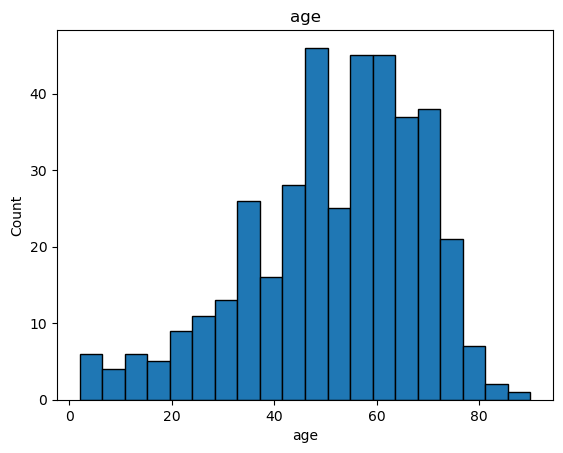

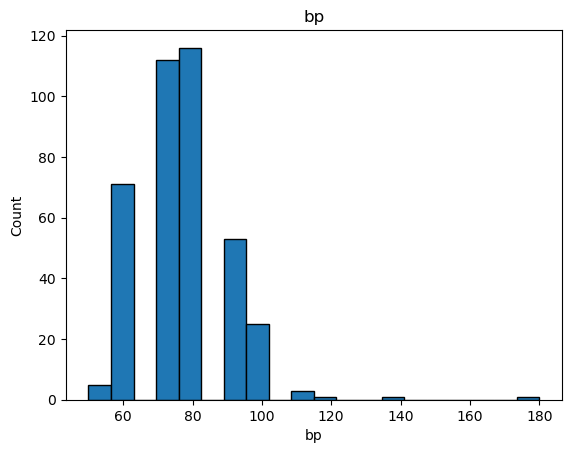

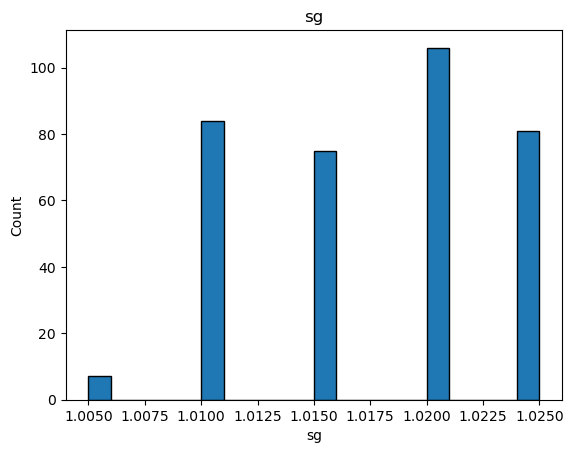

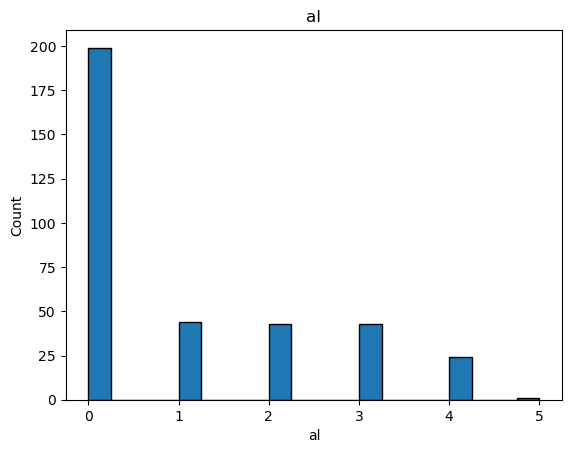

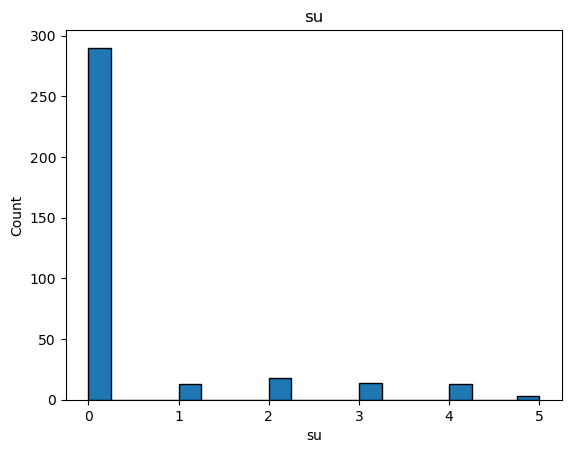

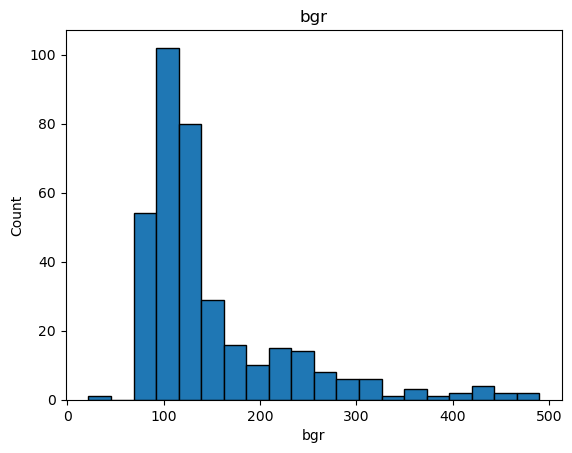

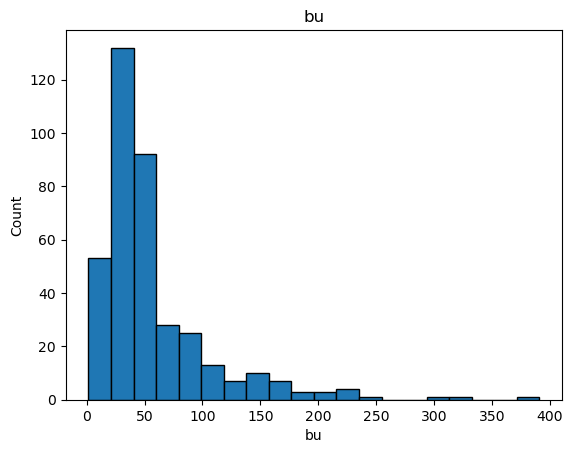

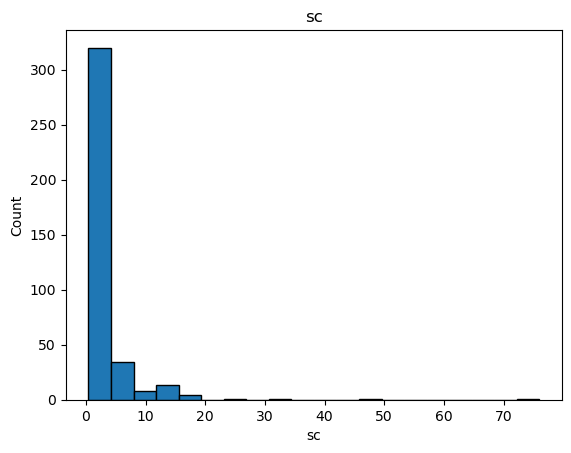

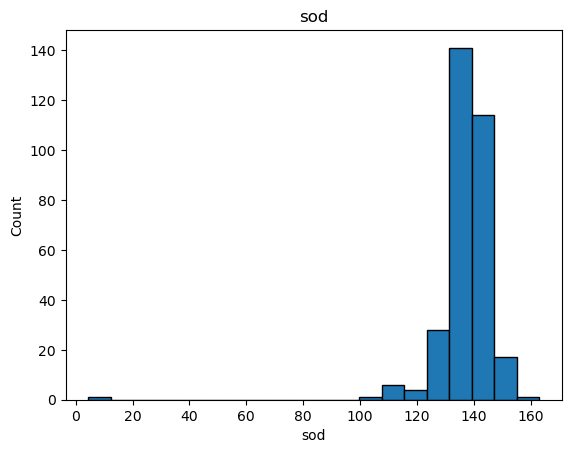

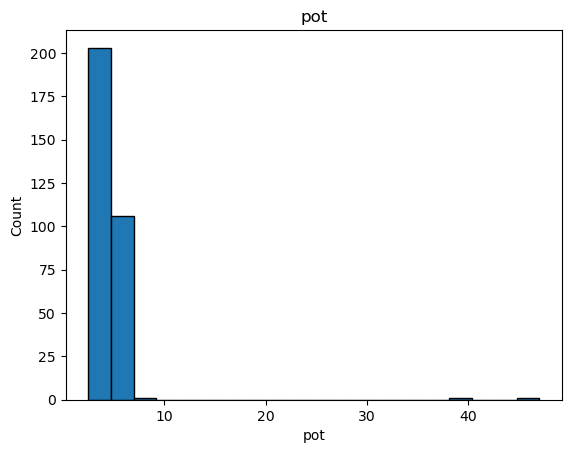

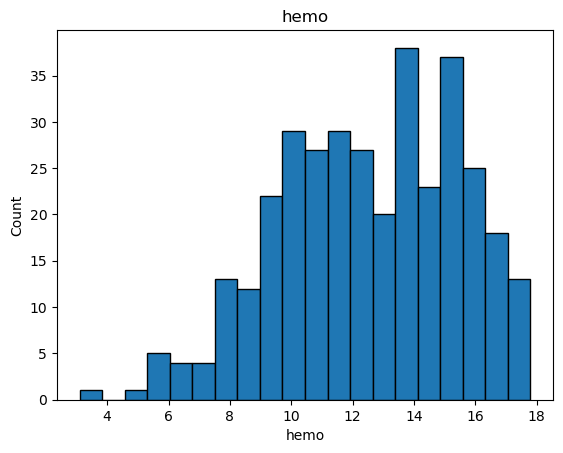

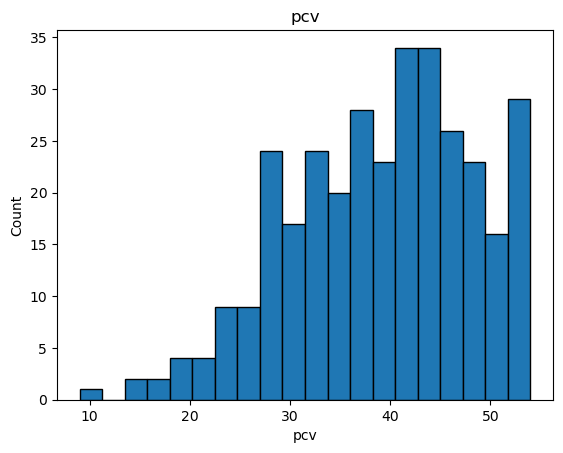

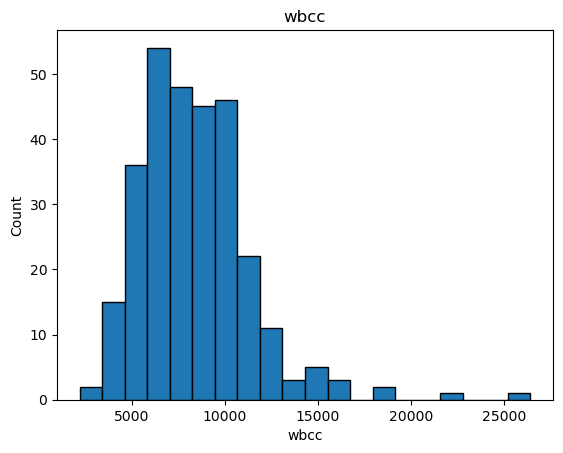

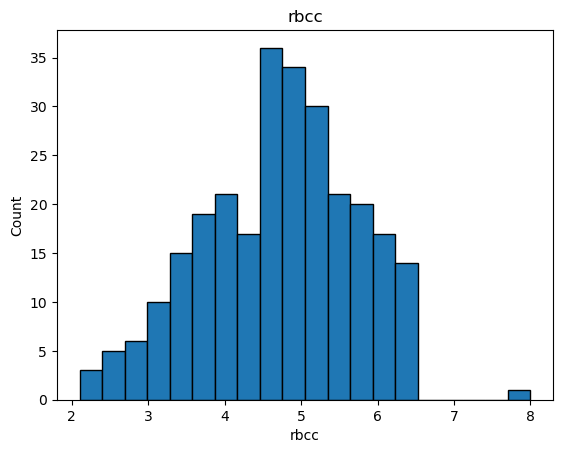

In [205]:
for col in df.columns:
    if df[col].dtype == 'float64':
        plt.hist(df[col], edgecolor = 'k', bins = 20)
        plt.title(col)
        plt.xlabel(col) 
        plt.ylabel('Count')
        plt.savefig('plots_'+col + '.jpg')
        plt.show()

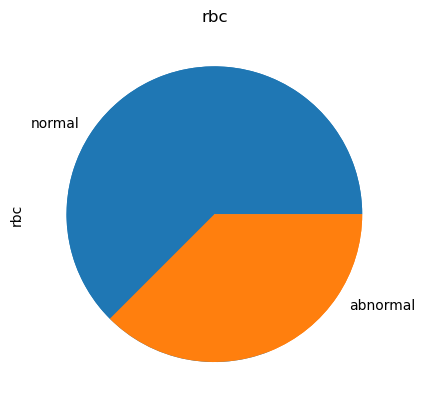

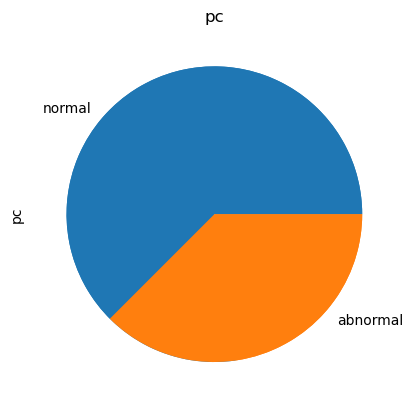

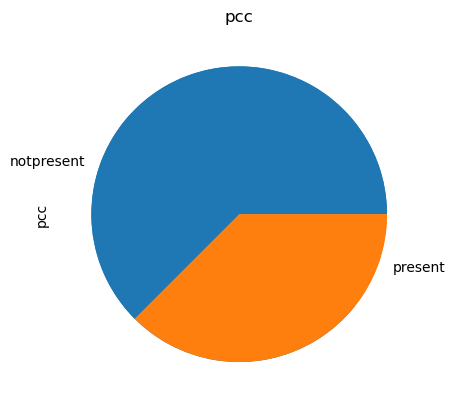

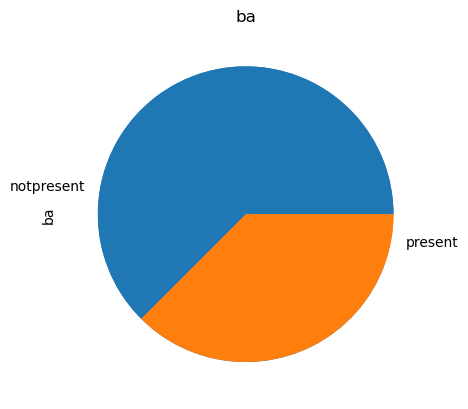

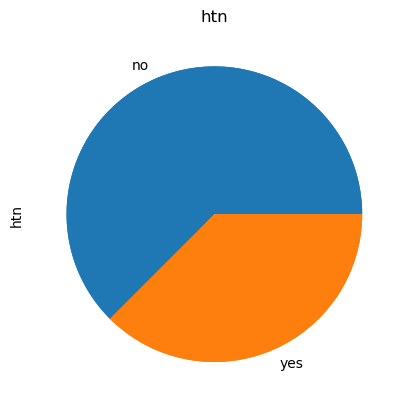

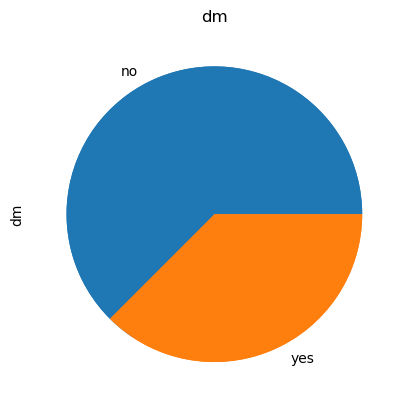

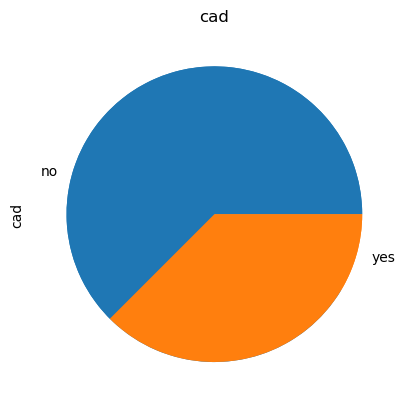

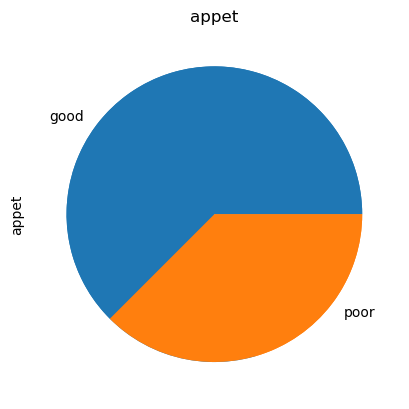

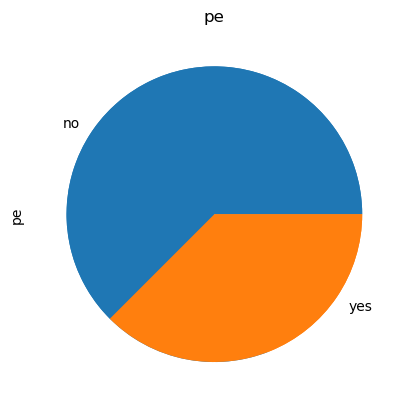

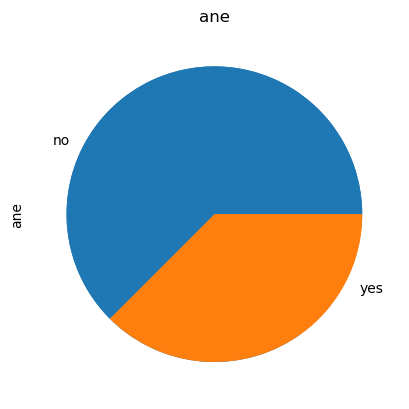

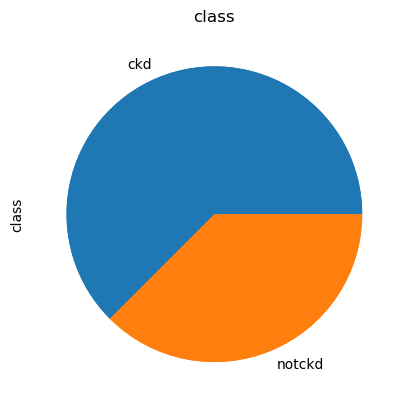

In [203]:
for column in df:
    if df[column].dtype=='category':
        df[column].value_counts().plot(kind='pie')
        plt.pie(df[col].value_counts())
        plt.title(column)
        plt.savefig('plots'+col + '.jpg')
        plt.show()

In [172]:
index = 0
headers = ['Index','Tag','Name','Data Type','Values','Missing values','Mean','Median','STD']
data =[]
for column in df:
    p = []
    if df[column].dtype == 'category':
        p.append(index)
        p.append(str(column))
        p.append(list[index])
        p.append('Category')
        p.append(str(df[column].isna().sum()))
        print(df[column].value_counts())
        p.append(df[column].value_counts())
        p.append('-')
        p.append('-')
        p.append('-')

    if df[column].dtype == 'float64':
        p.append(index)
        p.append(str(column))
        p.append(list[index])
        p.append('Numeric')
        p.append(df[column].isna().sum())
        p.append('-')
        p.append(round(df[column].mean(),2))
        p.append(round(df[column].median(),2))
        p.append(round(df[column].std(),2))

    index = index +1
    data.append(p)
        

normal      201
abnormal     47
Name: rbc, dtype: int64
normal      259
abnormal     76
Name: pc, dtype: int64
notpresent    354
present        42
Name: pcc, dtype: int64
notpresent    374
present        22
Name: ba, dtype: int64
no     251
yes    147
Name: htn, dtype: int64
no     261
yes    137
Name: dm, dtype: int64
no     364
yes     34
Name: cad, dtype: int64
good    317
poor     82
Name: appet, dtype: int64
no     323
yes     76
Name: pe, dtype: int64
no     339
yes     60
Name: ane, dtype: int64
ckd       250
notckd    150
Name: class, dtype: int64


In [173]:
list = [
'id',
'age',
'blood pressure',
'specific gravity',
'albumin',
'suger',
'red blood cells',
'pus cells',
'pus cells clumps',
'bacteria',
'blood glucose random',
'blood urea',
'serum creatinine',
'sodium',
'potassium',
'hemglobin',
'packed cell volume',
'white blood cells count',
'red blood cells count',
'hypertension',
'diabetes mellitus',
'coronary artery disease',
'appetite',
'pedal edema',
'anemia',
'class']


In [174]:
print(len(list))

26


In [175]:
from tabulate import tabulate


In [176]:
print(tabulate(data,headers=headers,tablefmt="github"))

|   Index | Tag   | Name                    | Data Type   |   Values | Missing values   | Mean    | Median   | STD     |
|---------|-------|-------------------------|-------------|----------|------------------|---------|----------|---------|
|         |       |                         |             |          |                  |         |          |         |
|       1 | age   | age                     | Numeric     |        9 | -                | 51.48   | 55.0     | 17.17   |
|       2 | bp    | blood pressure          | Numeric     |       12 | -                | 76.47   | 80.0     | 13.68   |
|       3 | sg    | specific gravity        | Numeric     |       47 | -                | 1.02    | 1.02     | 0.01    |
|       4 | al    | albumin                 | Numeric     |       46 | -                | 1.02    | 0.0      | 1.35    |
|       5 | su    | suger                   | Numeric     |       49 | -                | 0.45    | 0.0      | 1.1     |
|       6 | rbc   | red blood ce